In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
data=pd.read_csv('CSV_data/nasdq.csv')

In [3]:
data.head()

,Date,Open,High,Low,Close,Volume,InterestRate,ExchangeRate,VIX,TEDSpread,EFFR,Gold,Oil
0,2010-01-04,6.640000,6.810000,6.633333,6.746667,6514500.0,0.11,1.4419,20.04,0.17,0.12,1117.699951,81.510002
1,2010-01-05,6.643333,6.773333,6.643333,6.766667,4445100.0,0.11,1.4402,19.35,0.18,0.12,1118.099976,81.769997
2,2010-01-06,6.733333,6.786667,6.720000,6.763333,7340100.0,0.11,1.4404,19.16,0.19,0.12,1135.900024,83.180000
3,2010-01-07,6.750000,6.766667,6.630000,6.673333,8498400.0,0.11,1.4314,19.06,0.20,0.10,1133.099976,82.660004
4,2010-01-08,6.676667,6.766667,6.626667,6.743333,4347600.0,0.11,1.4357,18.13,0.20,0.11,1138.199951,82.750000


In [4]:
data['Date'] = pd.to_datetime(data['Date'])

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3914 entries, 0 to 3913
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          3914 non-null   datetime64[ns]
 1   Open          3914 non-null   float64       
 2   High          3914 non-null   float64       
 3   Low           3914 non-null   float64       
 4   Close         3914 non-null   float64       
 5   Volume        3914 non-null   float64       
 6   InterestRate  3914 non-null   float64       
 7   ExchangeRate  3914 non-null   float64       
 8   VIX           3914 non-null   float64       
 9   TEDSpread     3914 non-null   float64       
 10  EFFR          3914 non-null   float64       
 11  Gold          3914 non-null   float64       
 12  Oil           3914 non-null   float64       
dtypes: datetime64[ns](1), float64(12)
memory usage: 397.6 KB


In [6]:
data.tail()

,Date,Open,High,Low,Close,Volume,InterestRate,ExchangeRate,VIX,TEDSpread,EFFR,Gold,Oil
3909,2024-10-21,74.699997,74.870003,74.050003,74.300003,1902500.0,5.13,1.0854,18.37,0.09,4.83,2723.100098,70.559998
3910,2024-10-22,73.730003,74.459999,73.529999,74.290001,2365000.0,5.13,1.0854,18.20,0.09,4.83,2744.199951,72.089996
3911,2024-10-23,73.980003,74.489998,73.669998,73.910004,2513600.0,5.13,1.0854,19.24,0.09,4.83,2714.399902,70.769997
3912,2024-10-24,73.239998,75.580002,72.800003,75.239998,4038400.0,5.13,1.0854,19.08,0.09,4.83,2734.899902,70.190002
3913,2024-10-25,75.599998,75.680000,74.029999,74.690002,2230100.0,5.13,1.0854,19.08,0.09,4.83,2760.800049,71.690002


In [7]:
#Let's separate data into years and plot them in months

In [8]:
data['Year'] = data['Date'].dt.year

In [9]:
data['DayOfYear'] = data['Date'].dt.dayofyear

[Text(0.5, 1.0, 'Closing price for each day of the year')]

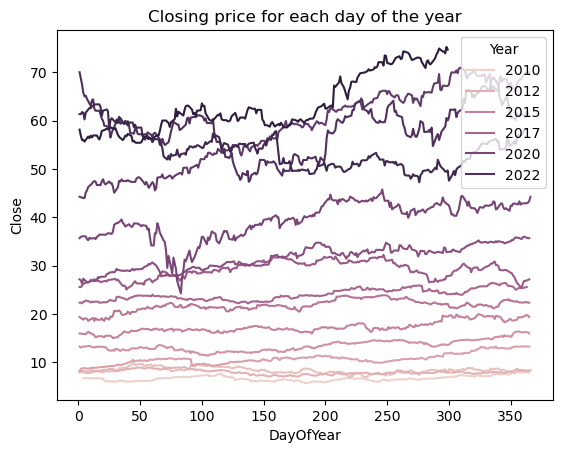

In [10]:
sns.lineplot(x='DayOfYear', y='Close', data=data, hue='Year').set(title='Closing price for each day of the year')

In [11]:
#Let's define minimum value of NASDAQ closing price in 2020 and find out which day it was

In [12]:
min_val_2020 = data[data['Year']==2020].sort_values(by='Close').iloc[0]

In [13]:
print('Lowest value was on: '+str(min_val_2020['Date'].strftime('%m/%d/%Y'))+' of value: '+str(min_val_2020['Close']))

Lowest value was on: 03/23/2020 of value: 24.286666870117188


In [14]:
#NASDAQ closing time is 4:00 pm Eastern Standard Time (GMT-05:00). Let's find out what time it was in Poland on 03/23/2020.

In [15]:
from datetime import datetime, tzinfo, timezone
import pytz

In [16]:
#for timeZone in pytz.all_timezones:
    #print(timeZone)

In [17]:
closing = datetime(2020,3,23,17,0)

In [18]:
print(closing)

2020-03-23 17:00:00


In [19]:
closing = closing.replace(tzinfo=pytz.timezone('Etc/GMT-5'))

In [20]:
print(closing)

2020-03-23 17:00:00+05:00


In [21]:
closing_Poland = closing.astimezone(pytz.timezone('Europe/Warsaw'))

In [22]:
print(closing_Poland)

2020-03-23 13:00:00+01:00


In [23]:
#Year 2020 is a leap year. Let's find the row corresponding to 28/02/2020 and find the difference in hours with date 01/03/2020.

In [24]:
print(data[data['Date'] == '2020-02-28'])

           Date       Open       High        Low      Close     Volume  \
2684 2020-02-28  35.076668  35.150002  33.490002  34.183334  6843000.0   

      InterestRate  ExchangeRate    VIX  TEDSpread  EFFR         Gold  \
2684          1.58        1.1001  40.11       0.21  1.58  1564.099976   

            Oil  Year  DayOfYear  
2684  44.759998  2020         59  


In [25]:
closing = datetime(2020,2,28)
begining = datetime(2020,3,1)

In [26]:
print(begining-closing)

2 days, 0:00:00


In [27]:
print(data.iloc[[2684,2685]])

           Date       Open       High        Low      Close     Volume  \
2684 2020-02-28  35.076668  35.150002  33.490002  34.183334  6843000.0   
2685 2020-03-01  35.076668  35.150002  33.490002  34.183334  6843000.0   

      InterestRate  ExchangeRate    VIX  TEDSpread  EFFR         Gold  \
2684          1.58        1.1001  40.11       0.21  1.58  1564.099976   
2685          0.65        1.1001  40.11       0.21  1.58  1564.099976   

            Oil  Year  DayOfYear  
2684  44.759998  2020         59  
2685  44.759998  2020         61  


In [28]:
#Our dataset has no value for 29/2/2020 but the difference is visible in days of the year. Let's find which days of 2020 are not recored in the dataset

In [29]:
data2020 = data[data['Year']==2020]

In [30]:
days2020 = data2020['DayOfYear'].values

In [31]:
missing_days = []
for i in range(366):
    if i==0:
        pass
    elif not(i in days2020):
        missing_days.append(i)

In [32]:
print(missing_days)

[4, 5, 11, 12, 18, 19, 25, 26, 33, 39, 40, 46, 47, 53, 54, 60, 67, 68, 74, 75, 81, 82, 88, 89, 95, 96, 102, 103, 109, 110, 116, 117, 123, 124, 130, 131, 137, 138, 144, 145, 151, 152, 158, 159, 165, 166, 172, 173, 179, 180, 186, 187, 193, 194, 200, 201, 207, 208, 215, 221, 222, 228, 229, 235, 236, 242, 243, 249, 250, 256, 257, 263, 264, 270, 271, 277, 278, 284, 285, 291, 292, 298, 299, 305, 312, 313, 319, 320, 326, 327, 333, 334, 340, 341, 347, 348, 354, 355, 361, 362]


In [33]:
from datetime import timedelta

In [34]:
missing_dates = []
for day in missing_days:
    missing_dates.append((datetime(2020, 1, 1) + timedelta(day - 1)).strftime('%Y-%m-%d'))

In [35]:
print(missing_dates)

['2020-01-04', '2020-01-05', '2020-01-11', '2020-01-12', '2020-01-18', '2020-01-19', '2020-01-25', '2020-01-26', '2020-02-02', '2020-02-08', '2020-02-09', '2020-02-15', '2020-02-16', '2020-02-22', '2020-02-23', '2020-02-29', '2020-03-07', '2020-03-08', '2020-03-14', '2020-03-15', '2020-03-21', '2020-03-22', '2020-03-28', '2020-03-29', '2020-04-04', '2020-04-05', '2020-04-11', '2020-04-12', '2020-04-18', '2020-04-19', '2020-04-25', '2020-04-26', '2020-05-02', '2020-05-03', '2020-05-09', '2020-05-10', '2020-05-16', '2020-05-17', '2020-05-23', '2020-05-24', '2020-05-30', '2020-05-31', '2020-06-06', '2020-06-07', '2020-06-13', '2020-06-14', '2020-06-20', '2020-06-21', '2020-06-27', '2020-06-28', '2020-07-04', '2020-07-05', '2020-07-11', '2020-07-12', '2020-07-18', '2020-07-19', '2020-07-25', '2020-07-26', '2020-08-02', '2020-08-08', '2020-08-09', '2020-08-15', '2020-08-16', '2020-08-22', '2020-08-23', '2020-08-29', '2020-08-30', '2020-09-05', '2020-09-06', '2020-09-12', '2020-09-13', '2020